In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

In [2]:
df = pd.read_csv('train_set.tsv', sep='\t', header=0)

TEST 1: base-normalization, logistic reg

In [ ]:
from sklearn.model_selection import train_test_split

df_clf = df.drop('min_CPA', axis=1)
X, y  = df_clf.loc[:, df_clf.columns != 'num_collisions'], df_clf['num_collisions']
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# basic clf: logistic reg for multiclass
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


y_train_count = y_train.value_counts()
len_y_train = len(y_train)
'''
weight_dict = {0: (1 - y_train_count[0] / len_y_train)**2,
               1: (1 - y_train_count[1] / len_y_train)**2,
               2: (1 - y_train_count[2] / len_y_train)**2,
               3: (1 - y_train_count[3] / len_y_train)**2,
               4: (1 - y_train_count[4] / len_y_train)**2
'''
weight_dict = {0: ( len_y_train / y_train_count[0]),
               1: ( len_y_train / y_train_count[1]),
               2: ( len_y_train / y_train_count[2]),
               3: ( len_y_train / y_train_count[3]),
               4: ( len_y_train / y_train_count[4])
               }
weight_dict

{0: 1.8427518427518428,
 1: 3.0364372469635628,
 2: 10.416666666666666,
 3: 32.608695652173914,
 4: 750.0}

In [ ]:
log_reg = LogisticRegression(solver='saga', max_iter=5000, class_weight=weight_dict,)
log_reg.fit(X_train, y_train)
# 500 iter ---> only for convergence | empirical search

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight={0: 1.8427518427518428, 1: 3.0364372469635628,
                                 2: 10.416666666666666, 3: 32.608695652173914,
                                 4: 750.0},
                   max_iter=5000, solver='saga')

In [ ]:
svc = SVC(class_weight=weight_dict)
svc.fit(X_train, y_train)

SVC(class_weight={0: 1.8427518427518428, 1: 3.0364372469635628,
                  2: 10.416666666666666, 3: 32.608695652173914, 4: 750.0})

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


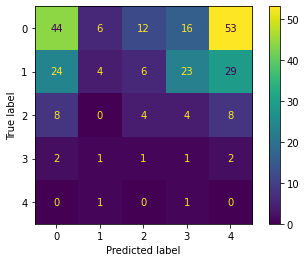

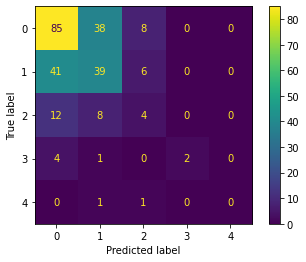

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score

plot_confusion_matrix(log_reg, X_test, y_test)
plot_confusion_matrix(svc, X_test, y_test) 


In [ ]:
print(f"logistic_regression f1: {f1_score(y_test, log_reg.predict(X_test), average='weighted')},")
print(f"svc  f1: {f1_score(y_test, svc.predict(X_test), average='weighted')}")

logistic_regression f1: 0.2661305602092676,
svc  f1: 0.5117035417570436


TEST 2:

  preprocessing: 
  separete collision vs non_collision ---> use a second model

0    359
1    226
2     65
3     18
4      2
Name: num_collisions, dtype: int64

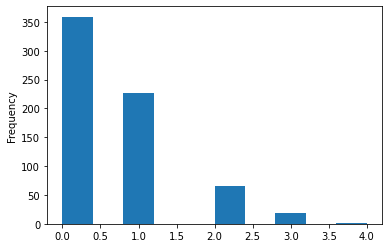

In [21]:
# ORIGINAL DISTRIBUTION 
df_clf = df.drop('min_CPA', axis=1)
#substitution of train test
df_clf_test = df_clf.sample(frac=0.33)
df_clf_train = df_clf.drop(df_clf_test.index)

df_clf_train['num_collisions'].plot.hist()
df_clf_train['num_collisions'].value_counts()

In [22]:
df_clf_train.reset_index(inplace=True)
df_clf_train.drop('index', axis='columns', inplace=True)
df_clf_train

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions
0,0.027068,-62300.591721,-59305.682068,6.705684,247.671970,-59569.480482,41566.912694,1.474570,-56681.475086,-5314.787648,...,-73393.079252,42576.874951,1.607547,-80967.561432,37684.582412,213.175442,-7.837820,41342.567045,33187.606489,3
1,1.841994,-19900.350438,59030.833595,208.716697,-58.033328,70435.277561,33913.163359,2.492568,-53314.291038,-15227.414024,...,82065.359024,-23468.668544,0.954796,21679.563309,-34471.154448,208.580726,147.651921,78980.509691,6091.533217,0
2,3.621532,-48565.126583,-11986.418570,-113.516305,-218.076997,-60503.694386,-34921.687695,4.941877,66081.722767,-13048.091807,...,60575.192521,42374.513704,4.056282,-31560.842269,36234.825255,-184.415246,-141.978597,-61666.394619,13057.001319,0
3,2.318417,52665.281329,-47498.516869,177.796999,-164.846698,63901.656021,-57916.461362,5.084740,-8541.183540,3543.309665,...,-52711.027260,26128.828499,2.515598,18186.463747,79639.001255,133.007662,-183.966901,63306.445359,17232.196700,0
4,2.045458,12519.761269,73346.653179,201.016283,-103.291128,61179.839038,48342.935773,4.053048,-20718.955267,-19460.116683,...,-363.679740,78081.012167,3.672419,-32292.519289,49454.043805,-126.905053,-216.182308,-82042.302624,-35294.535772,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,5.311708,56847.750712,-11045.226860,-191.028177,130.498496,-44528.370773,58208.595305,1.841936,-27643.755665,20748.767592,...,-5578.486656,-17866.863099,2.415617,-71839.035376,53234.537940,153.257849,-172.646763,-8773.275782,-17809.779416,1
666,3.011450,-17306.501630,7138.291422,29.173735,-222.900867,-5775.635254,-80962.875115,2.883169,16816.814742,-38368.369835,...,-29883.094522,15688.836209,0.588212,-48700.779519,-27986.596210,122.836045,184.170606,17599.761028,71419.166698,1
667,2.775677,-17067.554943,61383.574631,90.890740,-237.205934,25359.264069,-49341.602006,4.529004,33094.231094,25151.090417,...,-21135.417189,57702.993531,3.857388,67932.355669,57519.449588,-140.530069,-161.592698,-16546.830756,-39621.466658,1
668,1.069408,-70156.389933,10977.295766,213.943568,117.263798,10678.663954,55283.490853,0.294704,28290.108911,-26555.893531,...,-60886.252559,61825.387454,1.198816,-23684.569898,-32804.603209,225.945148,88.150897,85010.262644,9601.914598,1


In [23]:
df_clf_test.reset_index(inplace=True)
df_clf_test.drop('index', axis='columns', inplace=True)
df_clf_test

,UAV_1_track,UAV_1_x,UAV_1_y,UAV_1_vx,UAV_1_vy,UAV_1_target_x,UAV_1_target_y,UAV_2_track,UAV_2_x,UAV_2_y,...,UAV_4_target_x,UAV_4_target_y,UAV_5_track,UAV_5_x,UAV_5_y,UAV_5_vx,UAV_5_vy,UAV_5_target_x,UAV_5_target_y,num_collisions
0,3.222676,-30502.269226,6617.616493,-20.639472,-253.986884,-34265.587654,-39693.332320,3.098056,-15480.193643,75373.230174,...,21327.674091,-79131.979194,3.071384,24599.768766,26659.404349,17.888980,-254.380030,31878.402011,-76842.242915,0
1,0.248296,-1462.002227,15199.287399,62.265632,245.596955,13739.666748,75159.870908,5.755060,53140.492378,-20925.219214,...,60730.489352,23886.471996,4.066435,25857.211789,57718.254494,-176.789948,-133.271289,-63143.390921,-9373.936754,2
2,2.622285,-80114.427253,13705.329745,126.522658,-221.331617,-42590.866863,-51936.274935,4.304132,25230.009845,44061.740107,...,-94121.780791,21308.934191,4.947006,65439.000408,-9214.520635,-229.775839,54.920764,-85704.953300,26911.738134,1
3,0.116277,-20507.371826,-38839.985708,29.604857,253.457291,-9178.226328,58152.696593,4.026086,58131.175585,-37988.879989,...,25547.100462,-83280.813482,2.227663,-44856.234870,19376.830917,182.320918,-140.586975,61301.107786,-62480.696911,1
4,2.501960,-39242.723920,29617.982277,139.945695,-188.105726,21547.894445,-52092.737062,4.054930,18938.451562,-26163.827845,...,-1702.316837,36437.491500,5.273941,71064.331832,-2620.205707,-187.004793,117.647331,25897.341573,25794.979741,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2.970409,-35222.365570,75522.014012,40.286500,-233.037428,-12303.414548,-57052.753549,3.597839,57110.637733,65088.308236,...,15189.112978,75698.285534,1.091081,-42271.942781,2814.146497,223.376068,116.211241,56383.580408,54139.612483,1
326,5.271096,55967.531561,8410.382993,-198.496041,124.089786,-22291.447059,57333.978083,3.294063,3823.763577,57107.060365,...,34022.208607,62058.007050,0.136651,64411.729626,-37437.172297,34.752244,252.729034,73501.674318,28667.708142,1
327,2.371730,-42851.921281,22331.902642,149.916117,-154.647952,37796.245820,-60861.779906,0.768575,13825.088381,42553.996922,...,19900.703447,-57156.739129,4.012111,57841.745713,72957.996227,-189.817747,-159.971564,-40533.042008,-9948.733596,2
328,6.168006,57121.710959,-20012.508497,-25.702473,222.164795,48438.118603,55045.968958,1.840342,-53240.551406,-9147.489939,...,-36579.578129,-21948.140976,1.821164,-67300.239619,37389.564533,219.925384,-56.242303,84462.130880,-1421.167980,1


In [24]:
# PREPROCESSING: NORMALIZE --> fit the scaler before split sub-data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_clf_train.loc[:, df_clf_train.columns != 'num_collisions'])


0    359
1    311
Name: num_collisions, dtype: int64

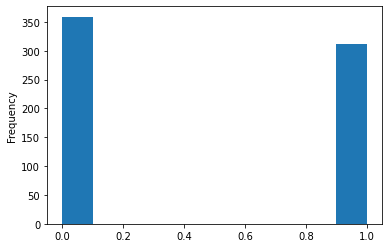

In [25]:

# PREPROCESSING: separete data
df_collision = df_clf_train.loc[df_clf['num_collisions'] != 0]

# transform num_collisions in bynary feature
for i in range(len(df_clf_train)):
  val = 1 if df_clf_train.at[i, 'num_collisions']>0 else 0
  df_clf_train.at[i, 'num_collisions'] = val

# ORIGINALDISTRIB OF BINARY CLASS
df_clf_train['num_collisions'].plot.hist() 
df_clf_train['num_collisions'].value_counts()

0    165
1    107
2     32
3      7
4      1
Name: num_collisions, dtype: int64

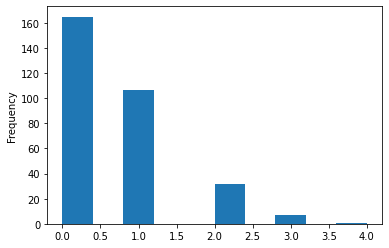

In [26]:
# ORIGINAL DISTRIB OF MULTICLASS
df_collision['num_collisions'].plot.hist()
df_collision['num_collisions'].value_counts()

0    325
1    311
Name: num_collisions, dtype: int64

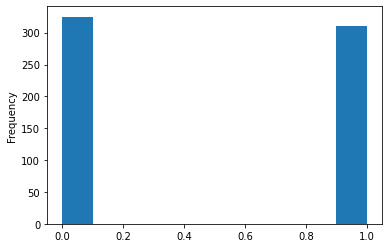

In [27]:
# remove sample by binary dataset, insert in multiclass sample
for i in range(0, 300, 5): 
  if df_clf_train.at[i, 'num_collisions'] == 0:
    df_collision = df_collision.append(df_clf_train.loc[i])
    df_clf_train.drop(i, inplace=True)

# RE-SAMPLE DISTRIB OF BINARY DATASET
df_clf_train['num_collisions'].plot.hist()
df_clf_train['num_collisions'].value_counts()

0.0    199
1.0    107
2.0     32
3.0      7
4.0      1
Name: num_collisions, dtype: int64

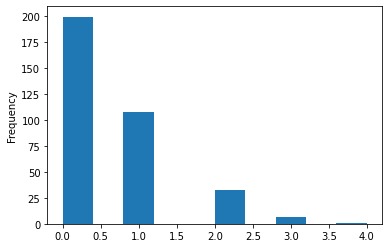

In [28]:
# RE-SAMPLE DISTRIB OF multicalss DATASET

df_collision['num_collisions'].plot.hist()
df_collision['num_collisions'].value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

class CLF: 

  def __init__(self, multiclass_weights, threshold_crash=0.5): 
    self.model_bin = LogisticRegression(solver='liblinear')
    self.model_multi = SVC(class_weight=multiclass_weights)
    self.threshold_crash = threshold_crash
  
  def fit(self, X_bin, y_bin, X_multi, y_multi):
    self.model_bin.fit(X_bin, y_bin)
    self.model_multi.fit(X_multi, y_multi)

  def predict(self, X):
    return np.where(self.model_bin.predict_proba(X)[:,0]<self.threshold_crash,
                    self.model_bin.predict(X),
                    self.model_multi.predict(X))

  
    

In [ ]:
# SPLIT DATA
# all this data are from train set, so there is no need of traintest_split
X_bin, y_bin  = df_clf_train.loc[:, df_clf_train.columns != 'num_collisions'], df_clf_train['num_collisions']
X_multi, y_multi  = df_collision.loc[:, df_collision.columns != 'num_collisions'], df_collision['num_collisions']

# CALC WEIGHT 
y_multi_count = y_multi.value_counts()
len_y_train = len(y_multi)

weight_dict = {0: (1 - y_multi_count[0] / len_y_train)**2,
               1: (1 - y_multi_count[1] / len_y_train)**2,
               2: (1 - y_multi_count[2] / len_y_train)**2,
               3: (1 - y_multi_count[3] / len_y_train)**2,
               4: (1 - y_multi_count[4] / len_y_train)**2
               }
'''

weight_dict = {0: ( len_y_train / y_multi_count[0]),
               1: ( len_y_train / y_multi_count[1]),
               2: ( len_y_train / y_multi_count[2]),
               3: ( len_y_train / y_multi_count[3]),
               4: ( len_y_train / y_multi_count[4])
               }
'''
weight_dict, y_multi_count

({0: 0.38315217391304346,
  1: 0.3654891304347826,
  2: 1.8315217391304348,
  3: 2.9184782608695654,
  4: 5.983695652173913},
 0.0    227
 1.0     99
 2.0     31
 3.0     10
 4.0      1
 Name: num_collisions, dtype: int64)

In [ ]:
# TRASNFORM AND NORMALIZEM
X_bin = scaler.transform(X_bin)
X_multi = scaler.transform(X_multi)

#test_data
X_test, y_test = df_clf_test.loc[:, df_clf_test.columns != 'num_collisions'], df_clf_test['num_collisions']
X_test = scaler.transform(X_test)

0.4059722775100854

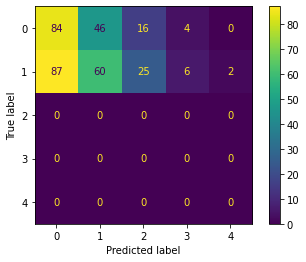

In [ ]:
#FIT CLF-DOUBLE MODEL 
clf = CLF(multiclass_weights=weight_dict, threshold_crash=0.75)
clf.fit(X_bin, y_bin, X_multi, y_multi)

#PLOT METRICS 
cf_matrix = confusion_matrix(clf.predict(X_test), y_test)
skl.metrics.ConfusionMatrixDisplay(cf_matrix).plot()
f1_score(y_test, clf.predict(X_test), average='weighted')

TEST 3: SET OF LOGISTIC REGRESSOR

In [ ]:
class CLF_double_log:

  def __init__(self, multiclass_weights, threshold_crash=0.5): 
    self.model_bin = LogisticRegression(solver='liblinear')
    self.model_multi = LogisticRegression(solver='saga', 
                                          max_iter=500,
                                          class_weight=multiclass_weights)
    self.threshold_crash = threshold_crash
  
  def fit(self, X_bin, y_bin, X_multi, y_multi):
    self.model_bin.fit(X_bin, y_bin)
    self.model_multi.fit(X_multi, y_multi)

  def predict(self, X):
    return np.where(self.model_bin.predict_proba(X)[:,0]<self.threshold_crash,
                    self.model_bin.predict(X),
                    self.model_multi.predict(X))

  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4020119370207039

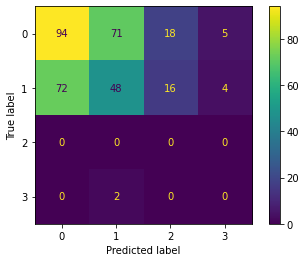

In [ ]:
clf_double_logit = CLF_double_log(multiclass_weights=weight_dict, threshold_crash=0.75)
clf_double_logit.fit(X_bin, y_bin, X_multi, y_multi)


#PLOT METRICS 
cf_matrix = confusion_matrix(clf_double_logit.predict(X_test), y_test)
skl.metrics.ConfusionMatrixDisplay(cf_matrix).plot()
f1_score(y_test, clf_double_logit.predict(X_test), average='weighted')

REGRESSION SECT


In [ ]:
df_reg = df.drop('num_collisions', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df_reg.loc[:, df_reg.columns != 'min_CPA']
y = df_reg['min_CPA']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
params = {
    'C'      : (1e-6, 1e-4, 1e-2, 1.0),
    'gamma'  : ('scale', 'auto'),
    'degree' : (1, 3, 5),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

In [ ]:
%pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV

def scoring(model, X, y):
  return mean_squared_error(y, model.predict(X))

cv = KFold(n_splits=4)
search = BayesSearchCV(estimator=SVR(), 
                       scoring=scoring,
                       search_spaces=params,
                       n_jobs=-1, cv=cv)

In [ ]:
search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packa

BayesSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
              estimator=SVR(), n_jobs=-1,
              scoring=<function scoring at 0x7f437682e0d0>,
              search_spaces={'C': (1e-06, 0.0001, 0.01, 1.0),
                             'degree': (1, 3, 5), 'gamma': ('scale', 'auto'),
                             'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("val. score: %s" % search.best_score_)
print("test score: %s" % search.score(X_test, y_test))
print("best params: %s" % str(search.best_params_))

val. score: 129130492.59370218
test score: 147641097.2211131
best params: OrderedDict([('C', 1.0), ('degree', 3), ('gamma', 'scale'), ('kernel', 'linear')])


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": (200, 300, 500),
    "max_depth": (1, 2, 3, 4, 5), 
    "learning_rate": (0.1, 0.05, 0.01),
}


cv = KFold(n_splits=4)
search = BayesSearchCV(estimator= GradientBoostingRegressor(),
                       scoring=scoring,
                       search_spaces=params,
                       n_jobs=-1, cv=cv)
search.fit(X_train, y_train)


print("val. score: %s" % search.best_score_)
print("test score: %s" % search.score(X_test, y_test))
print("best params: %s" % str(search.best_params_))

/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.8/dist-packa

val. score: 147748563.1174178
test score: 143599436.03617823
best params: OrderedDict([('learning_rate', 0.1), ('max_depth', 2), ('n_estimators', 500)])
